# Data Extraction

## 라이브러리 임포트

In [1]:
import datetime
import pandas as pd
from pandas import DataFrame
from scipy.io import loadmat

## 가져올 데이터셋 입력

In [2]:
BAT_No = input()

In [3]:
BAT_No

'B0018'

## Charge cycles 데이터 추출

In [4]:
def charge_data(battery):  # similarly write a fn for charge data
    mat = loadmat("./DATA/RAW/BatteryAgingARC-FY08Q4/" + BAT_No + ".mat")
    c = 0
    chdataset = []

    for i in range(len(mat[battery][0, 0]["cycle"][0])):
        row = mat[battery][0, 0]["cycle"][0, i]
        if row["type"][0] == "charge":

            ambient_temperature = row["ambient_temperature"][0][0]
            date_time = datetime.datetime(
                int(row["time"][0][0]),
                int(row["time"][0][1]),
                int(row["time"][0][2]),
                int(row["time"][0][3]),
                int(row["time"][0][4]),
            ) + datetime.timedelta(seconds=int(row["time"][0][5]))
            data = row["data"]
            for j in range(len(data[0][0]["Voltage_measured"][0])):
                voltage_measured = data[0][0]["Voltage_measured"][0][j]
                current_measured = data[0][0]["Current_measured"][0][j]
                temperature_measured = data[0][0]["Temperature_measured"][0][j]
                current_charge = data[0][0]["Current_charge"][0][j]
                voltage_charge = data[0][0]["Voltage_charge"][0][j]
                time = data[0][0]["Time"][0][j]
                chdataset.append(
                    [
                        c + 1,
                        ambient_temperature,
                        date_time,
                        voltage_measured,
                        current_measured,
                        temperature_measured,
                        current_charge,
                        voltage_charge,
                        time,
                    ]
                )
            c = c + 1
    
    return chdataset

In [5]:
charge_dataset = charge_data(BAT_No)
charge_df=pd.DataFrame(data=charge_dataset,columns=['cycle', 'ambient_temperature', 'datetime', 
                                'voltage_measured','current_measured',
                                'temperature_measured','current',
                                'voltage', 'time'])

charge_df

,cycle,ambient_temperature,datetime,voltage_measured,current_measured,temperature_measured,current,voltage,time
0,1,24,2008-07-07 12:26:45,3.865713,0.001014,23.735721,0.000,-0.007,0.000
1,1,24,2008-07-07 12:26:45,3.447651,-4.034445,23.743956,-4.036,1.553,2.484
2,1,24,2008-07-07 12:26:45,4.005559,1.517435,23.773723,1.507,4.721,5.109
3,1,24,2008-07-07 12:26:45,4.015989,1.514558,23.777077,1.507,4.737,7.562
4,1,24,2008-07-07 12:26:45,4.023230,1.517284,23.792710,1.507,4.743,10.062
...,...,...,...,...,...,...,...,...,...
279805,134,24,2008-08-20 05:49:31,4.180760,-0.001612,23.160264,0.000,-0.007,9956.984
279806,134,24,2008-08-20 05:49:31,4.181660,-0.002837,23.166556,0.000,-0.007,9964.031
279807,134,24,2008-08-20 05:49:31,4.182311,-0.002382,23.163557,0.000,-0.007,9971.078
279808,134,24,2008-08-20 05:49:31,4.182857,-0.002210,23.153626,0.000,-0.007,9978.125


### 각 베터리 데이터셋의 특이사항 삭제

In [6]:
if BAT_No == "B0005":
    # B0005
    charge_df.drop(charge_df[charge_df["cycle"] == 1].index, axis=0, inplace=True)
    charge_df.drop(charge_df[charge_df["cycle"] == 33].index, axis=0, inplace=True)
    charge_df.drop(charge_df[charge_df["cycle"] == 170].index, axis=0, inplace=True) #charge 데이터셋의 170cycle 삭제 , 170cycle의 capacity 없음

elif BAT_No == "B0006":
    # B0006
    charge_df.drop(charge_df[charge_df["cycle"] == 1].index, axis=0, inplace=True)
    charge_df.drop(charge_df[charge_df["cycle"] == 33].index, axis=0, inplace=True)
    charge_df.drop(charge_df[charge_df["cycle"] == 170].index, axis=0, inplace=True) #charge 데이터셋의 170cycle 삭제 , 170cycle의 capacity 없음

elif BAT_No == "B0007":
    # B0007
    charge_df.drop(charge_df[charge_df["cycle"] == 1].index, axis=0, inplace=True)
    charge_df.drop(charge_df[charge_df["cycle"] == 33].index, axis=0, inplace=True)
    charge_df.drop(charge_df[charge_df["cycle"] == 170].index, axis=0, inplace=True) #charge 데이터셋의 170cycle 삭제 , 170cycle의 capacity 없음

elif BAT_No == "B0018":
    # B0018
    charge_df.drop(charge_df[charge_df["cycle"] == 1].index, axis=0, inplace=True)
    charge_df.drop(charge_df[charge_df["cycle"] == 47].index, axis=0, inplace=True)
    charge_df.drop(charge_df[charge_df["cycle"] == 58].index, axis=0, inplace=True)

### 이상치 제거

In [7]:
outliner_index = []

for col in charge_df.columns:
    if col == "voltage" or col == "current":
        col_mean = charge_df[col].mean()
        col_std = charge_df[col].std()

        for row in charge_df.index:
            z_score = (charge_df.loc[row, col] - col_mean) / col_std

            if z_score >= 3 or z_score <= -3 :
                if row not in outliner_index:
                    outliner_index.append(row)

charge_df.drop(outliner_index, axis=0, inplace=True)


### 0초 데이터 삭제

In [8]:
charge_df.drop(charge_df[charge_df["time"] == 0].index, axis=0, inplace=True)

### 7200초 이후 데이터 삭제 (CCCV충전임으로 7200초 이후 부터는 데이터의 뚜렷한 차이 X)

In [9]:
charge_df.drop(charge_df[charge_df["time"] >= 7200].index, axis=0, inplace=True)

## Discharge cycles

In [10]:
def disch_data(BAT_No):
    mat = loadmat("./DATA/RAW/BatteryAgingARC-FY08Q4/" + BAT_No + ".mat")

    c = 0
    disdataset = []
    capacity_data = []

    for i in range(len(mat[BAT_No][0, 0]["cycle"][0])):
        row = mat[BAT_No][0, 0]["cycle"][0, i]
        if row["type"][0] == "discharge":
            ambient_temperature = row["ambient_temperature"][0][0]
            date_time = datetime.datetime(
                int(row["time"][0][0]),
                int(row["time"][0][1]),
                int(row["time"][0][2]),
                int(row["time"][0][3]),
                int(row["time"][0][4]),
            ) + datetime.timedelta(seconds=int(row["time"][0][5]))
            data = row["data"]
            capacity = data[0][0]["Capacity"][0][0]
            for j in range(len(data[0][0]["Voltage_measured"][0])):
                voltage_measured = data[0][0]["Voltage_measured"][0][j]
                current_measured = data[0][0]["Current_measured"][0][j]
                temperature_measured = data[0][0]["Temperature_measured"][0][j]
                current_load = data[0][0]["Current_load"][0][j]
                voltage_load = data[0][0]["Voltage_load"][0][j]
                time = data[0][0]["Time"][0][j]
                disdataset.append(
                    [
                        c + 1,
                        ambient_temperature,
                        date_time,
                        capacity,
                        voltage_measured,
                        current_measured,
                        temperature_measured,
                        current_load,
                        voltage_load,
                        time,
                    ]
                )
                capacity_data.append([c + 1, ambient_temperature, date_time, capacity])
            c = c + 1
    
    return pd.DataFrame(
            data=disdataset,
            columns=[
                "cycle",
                "ambient_temperature",
                "datetime",
                "capacity",
                "voltage_measured",
                "current_measured",
                "temperature_measured",
                "current",
                "voltage",
                "time",
            ]
    )
    


In [11]:
discharge_df = disch_data(BAT_No)
discharge_df.drop(discharge_df[discharge_df["cycle"] == 1].index, axis=0, inplace=True)
display(discharge_df)
capacity = discharge_df["capacity"].unique()

capacity_df = pd.DataFrame(capacity, columns=["capacity"])
capacity_df.index = [i + 1 for i in capacity_df.index]
capacity_df

,cycle,ambient_temperature,datetime,capacity,voltage_measured,current_measured,temperature_measured,current,voltage,time
366,2,24,2008-07-07 21:53:06,1.843196,4.186516,0.000052,24.314787,0.0006,0.000,0.000
367,2,24,2008-07-07 21:53:06,1.843196,4.186704,0.002301,24.319880,0.0006,4.202,9.438
368,2,24,2008-07-07 21:53:06,1.843196,3.983070,-2.009352,24.348535,1.9988,3.050,19.672
369,2,24,2008-07-07 21:53:06,1.843196,3.967773,-2.007569,24.417358,1.9986,3.044,29.141
370,2,24,2008-07-07 21:53:06,1.843196,3.955925,-2.007182,24.490352,1.9986,3.033,38.578
...,...,...,...,...,...,...,...,...,...,...
34861,132,24,2008-08-20 08:37:19,1.341051,3.443760,-0.002426,35.383979,0.0006,0.000,2686.359
34862,132,24,2008-08-20 08:37:19,1.341051,3.453271,-0.000981,35.179732,0.0006,0.000,2700.546
34863,132,24,2008-08-20 08:37:19,1.341051,3.461963,0.000209,34.977000,0.0006,0.000,2714.640
34864,132,24,2008-08-20 08:37:19,1.341051,3.469907,0.001516,34.785943,0.0006,0.000,2728.750


,capacity
1,1.843196
2,1.839602
3,1.830674
4,1.832700
5,1.828529
...,...
127,1.362737
128,1.363405
129,1.351865
130,1.354797


### Save

In [12]:
charge_df.to_csv(f"./DATA/DataFrame/{BAT_No}_charge_df.csv", index=False)
capacity_df.to_csv(f"./DATA/DataFrame/{BAT_No}_capacity_df.csv", index=False)

### 데이터 점검

In [13]:
import matplotlib.pyplot as plt

In [14]:
bat_df = pd.read_csv(f"./DATA/DataFrame/{BAT_No}_charge_df.csv")
bat_df

,cycle,ambient_temperature,datetime,voltage_measured,current_measured,temperature_measured,current,voltage,time
0,2,24,2008-07-07 18:20:14,3.479525,1.515638,24.286875,1.507,4.187,5.219
1,2,24,2008-07-07 18:20:14,3.497943,1.513689,24.300266,1.507,4.219,7.766
2,2,24,2008-07-07 18:20:14,3.510502,1.516136,24.298628,1.507,4.235,10.313
3,2,24,2008-07-07 18:20:14,3.521757,1.516216,24.298850,1.507,4.246,12.875
4,2,24,2008-07-07 18:20:14,3.531288,1.513488,24.307403,1.507,4.257,15.391
...,...,...,...,...,...,...,...,...,...
191104,134,24,2008-08-20 05:49:31,4.196436,0.061513,23.307849,0.058,4.235,7166.750
191105,134,24,2008-08-20 05:49:31,4.195863,0.063517,23.305422,0.058,4.235,7173.922
191106,134,24,2008-08-20 05:49:31,4.196385,0.057873,23.302189,0.058,4.235,7181.062
191107,134,24,2008-08-20 05:49:31,4.196496,0.058975,23.296302,0.058,4.235,7188.250


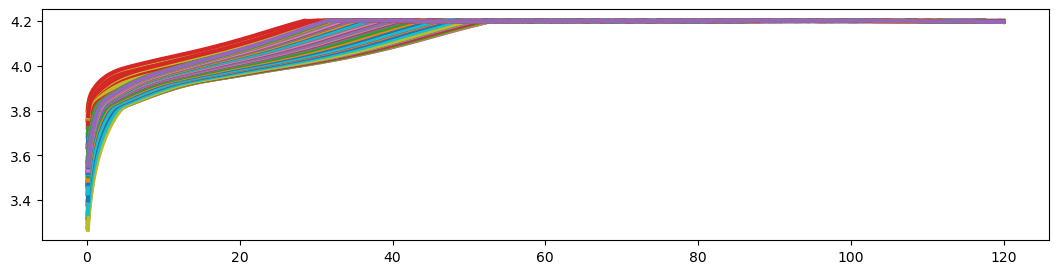

In [15]:
plt.rcParams['figure.figsize'] = [13, 3]
for i in range(167):
    tmp = bat_df.loc[bat_df.loc[:,"cycle"] == i]
    plt.plot(tmp.loc[:,"time"]/60, tmp.loc[:,"voltage_measured"], linewidth=3)
        

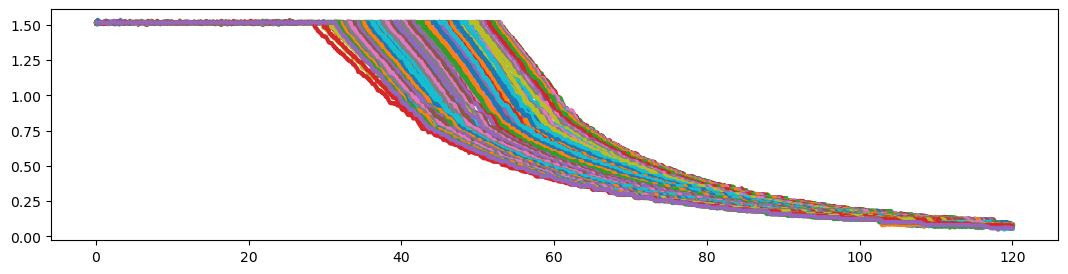

In [16]:
for i in range(167):
    tmp = bat_df.loc[bat_df.loc[:,"cycle"] == i]
    plt.plot(tmp.loc[:,"time"]/60, tmp.loc[:,"current_measured"], linewidth=3)

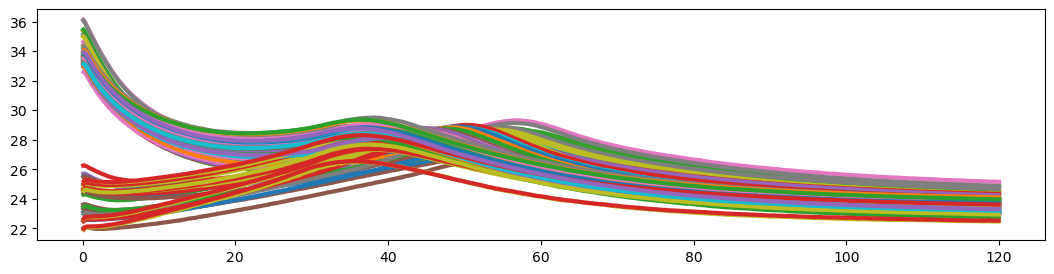

In [17]:
for i in range(167):
    tmp = bat_df.loc[bat_df.loc[:,"cycle"] == i]
    plt.plot(tmp.loc[:,"time"]/60, tmp.loc[:,"temperature_measured"], linewidth=3)

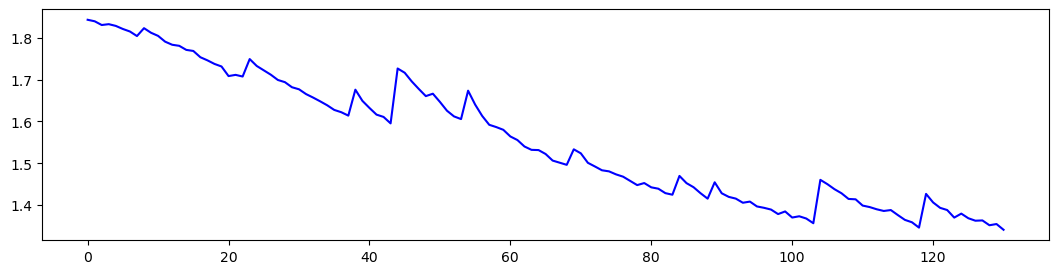

In [18]:
capacity_df = pd.read_csv(f"./DATA/DataFrame/{BAT_No}_capacity_df.csv")
plt.plot(capacity_df.index, capacity_df["capacity"], color='blue')

In [19]:
print(len(bat_df["cycle"].unique()))
print(len(capacity_df["capacity"].unique()))

131
131
